In [1]:
using NonlinearSolve

λ = 0:0.01:1
xguess = -1
x_vec = zeros(length(λ))
f_vec = zeros(length(λ))

for i in 1:length(λ)
    f(x, p) = @. x^3 - 2 * λ[i] * x + 1
    prob = NonlinearProblem(f, [xguess])
    sol = solve(prob)
    xguess = sol.u[1]
    x_vec[i] = sol.u[1]
end

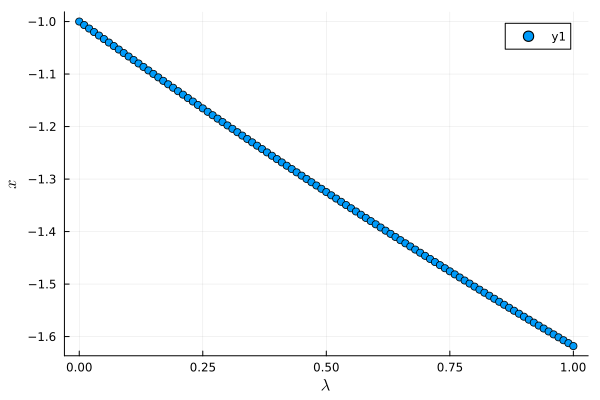

In [7]:
using Plots, LaTeXStrings

scatter(λ, x_vec, xlabel=L"$\lambda$", ylabel=L"$x$")

In [25]:
λ = 10:-0.1:1
xguesss = [1/(2λ[1]), sqrt(2λ[1]), -sqrt(2λ[1])]
x_mat = zeros(length(xguesss), length(λ))

for i in 1:length(λ)
    f(x, p) = @. x^3 - 2 * λ[i] * x + 1

    for (j, xguess) in enumerate(xguesss)
        prob = NonlinearProblem(f, [xguess])
        sol = solve(prob)
        xguesss[j] = sol.u[1]
        x_mat[j, i] = sol.u[1]
    end

end

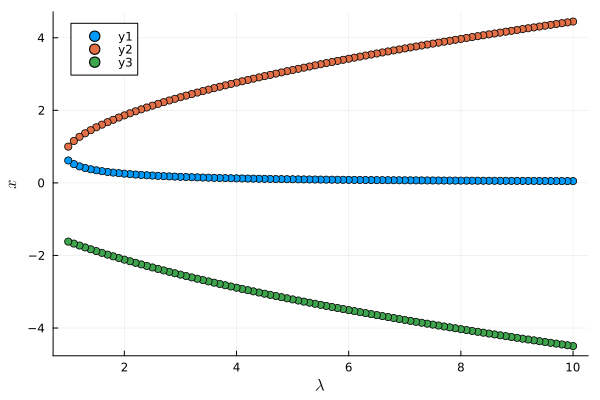

In [26]:
scatter(λ, x_mat', xlabel=L"$\lambda$", ylabel=L"$x$")